In [2]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt

rolling_period = 20

def read_system_json(algo, env, scenario, env_n, seed):
    seed = f"seed_{seed}"
    path = f"../results/json/{algo}/{env}/{scenario}/envs_{env_n}/{seed}/"
    try:
        with open(path + "metrics.json", "r") as f:
            data = json.load(f)
    except:
        print(f"Failed to read {path}")
        return None

    data = data[env][scenario][algo][seed]
    records = {}
    for key in data.keys():
        n = key.split("_")[1]
        if len(n) > 3: continue # skip abs metric
        entry = {"mean_episode_returns": data[key]["mean_episode_returns"][0]}
        records[int(n)] = entry
    df = pd.DataFrame.from_dict(records, orient="index")
    if len(df) == 0: return None
    # TODO: this method provides a lagging rolling mean, I need to change it to provide a RT mean
    df[f"rolling_20"] = df["mean_episode_returns"].rolling(20, min_periods=1).mean()
    df[f"rolling_10"] = df["mean_episode_returns"].rolling(10, min_periods=1).mean()
    
    return df

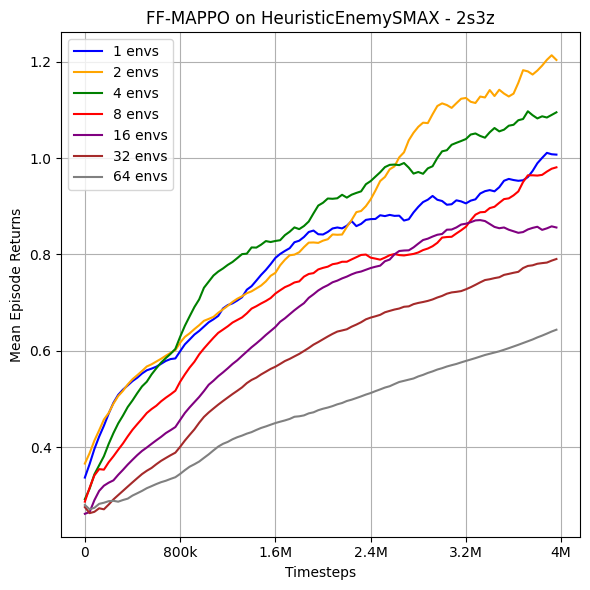

In [25]:
env = "HeuristicEnemySMAX"
scenario = "2s3z"

env_ns = [1, 2, 4, 8, 16, 32, 64]
seeds = [43]
colors = ['blue', "orange", 'green', 'red', 'purple', 'brown', 'gray', 'olive', 'cyan']

fig = plt.figure(figsize=(6, 6))
ax = plt.gca()

i = 0
for env_n in env_ns:
    for seed in seeds:
        df = read_system_json("ff_mappo", env, scenario, env_n, seed)
        # df = read_system_json("ff_mappo_ewma", env, scenario, env_n, seed)

        if df is None: continue
        
        # df.plot(y="mean_episode_returns", alpha=0.2, ax=ax, color=colors[i])
        df.plot(y="rolling_20", label=f"{env_n} envs", ax=ax, color=colors[i])

        i += 1

ax.grid(True)
plt.title(f"FF-MAPPO on {env} - {scenario}")
plt.xlabel("Timesteps")
plt.ylabel("Mean Episode Returns")
plt.xticks([0, 20, 40, 60, 80, 100], ["0", "800k", "1.6M", "2.4M", "3.2M", "4M"])
plt.tight_layout()
plt.savefig(f"../Images/ff_mappo_{env}_{scenario}.jpeg", pad_inches=1.2, bbox_inches="tight")


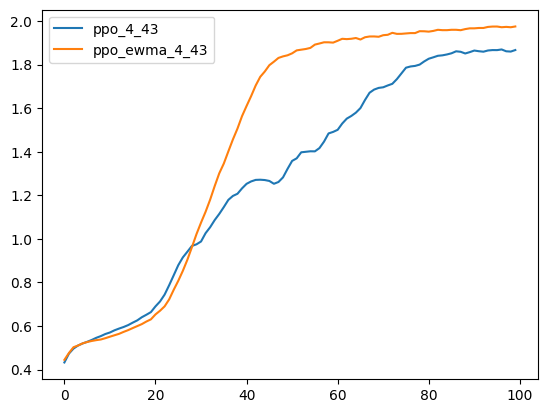

In [56]:
env = "HeuristicEnemySMAX"
# scenario = "2s3z"
# scenario = "3s5z"
scenario = "6h_vs_8z"

# env_ns = [1, 2, 4, 8, 32]
env_ns = [4]
seeds = [43]
colors = ['blue', "orange", 'green', 'red', 'purple', 'brown', 'gray', 'olive', 'cyan']

ax = plt.gca()

i = 0
for env_n in env_ns:
    for seed in seeds:
        df = read_system_json("ff_mappo", env, scenario, env_n, seed)

        if df is None: continue
        
        # df.plot(y="mean_episode_returns", alpha=0.2, ax=ax, color=colors[i])
        df.plot(y="rolling_20", label=f"ppo_{env_n}_{seed}", ax=ax)

        df = read_system_json("ff_mappo_ewma", env, scenario, env_n, seed)
        if df is None: continue
        df.plot(y="rolling_20", label=f"ppo_ewma_{env_n}_{seed}", ax=ax)

        i += 1

Failed to read ../results/json/ff_mappo_ewma/HeuristicEnemySMAX/2s3z/envs_1/seed_42/
Failed to read ../results/json/ff_mappo_ewma/HeuristicEnemySMAX/2s3z/envs_2/seed_42/
Failed to read ../results/json/ff_mappo_ewma/HeuristicEnemySMAX/2s3z/envs_4/seed_42/
Failed to read ../results/json/ff_mappo_ewma/HeuristicEnemySMAX/2s3z/envs_8/seed_42/
Failed to read ../results/json/ff_mappo_ewma/HeuristicEnemySMAX/2s3z/envs_16/seed_42/
Failed to read ../results/json/ff_mappo_ewma/HeuristicEnemySMAX/2s3z/envs_32/seed_42/
Failed to read ../results/json/ff_mappo_ewma/HeuristicEnemySMAX/2s3z/envs_64/seed_42/
Failed to read ../results/json/ff_mappo_ewma/HeuristicEnemySMAX/2s3z/envs_64/seed_43/


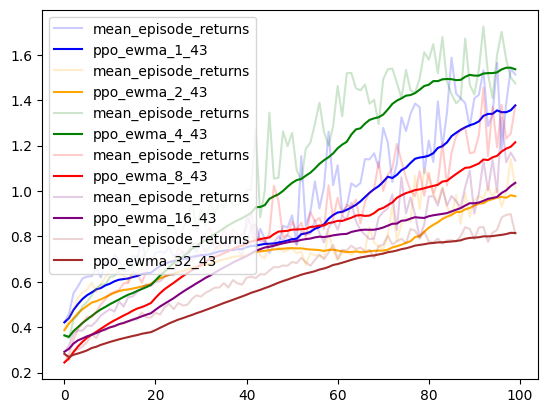

In [30]:
env = "HeuristicEnemySMAX"
scenario = "2s3z"

env_ns = [1, 2, 4, 8, 16, 32, 64]
seeds = [42, 43]
colors = ['blue', "orange", 'green', 'red', 'purple', 'brown', 'gray', 'olive', 'cyan']

ax = plt.gca()

i = 0
for env_n in env_ns:
    for seed in seeds:
        df = read_system_json("ff_mappo_ewma", env, scenario, env_n, seed)

        if df is None: continue
        
        df.plot(y="mean_episode_returns", alpha=0.2, ax=ax, color=colors[i])
        df.plot(y="rolling_20", label=f"ppo_ewma_{env_n}_{seed}", ax=ax, color=colors[i])

        i += 1


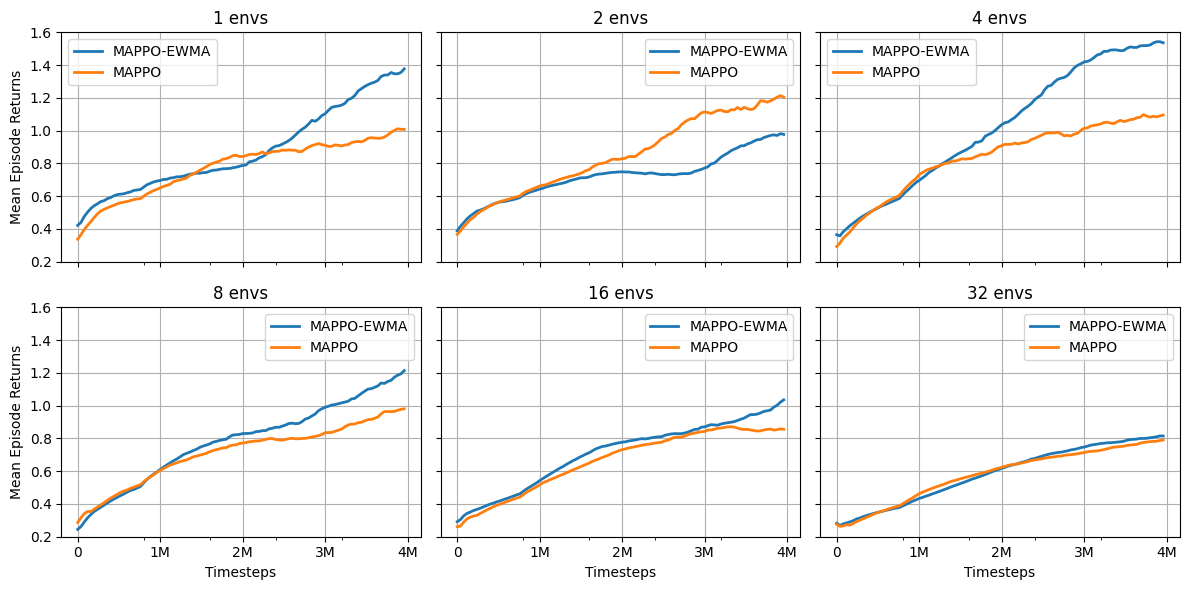

In [34]:
env = "HeuristicEnemySMAX"
scenario = "2s3z"

env_ns = [1, 2, 4, 8, 16, 32]
seeds = [43]
colors = ['blue', "orange", 'green', 'red', 'yellow', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']

# ax = plt.gca()
fig, axs = plt.subplots(ncols = 3, nrows = 2, figsize=(12, 6), sharex=True, sharey=True)

i = 0
for env_n in env_ns:
    for seed in seeds:
        ax = axs[i//3][i%3]
        df = read_system_json("ff_mappo_ewma", env, scenario, env_n, seed)
        df.plot(y="rolling_20", label=f"MAPPO-EWMA", ax=ax, linewidth=2)

        df = read_system_json("ff_mappo", env, scenario, env_n, seed)
        df.plot(y="rolling_20", label=f"MAPPO", ax=ax, linewidth=2)

        ax.grid(True)
        ax.set_title(f"{env_n} envs")
        ax.set_ylim(0.2, 1.6)


        i += 1

    axs[0][0].set_ylabel("Mean Episode Returns")
    axs[1][0].set_ylabel("Mean Episode Returns")
    axs[1][0].set_xlabel("Timesteps")
    axs[1][1].set_xlabel("Timesteps")
    axs[1][2].set_xlabel("Timesteps")
    axs[1][0].set_xticks([0, 25, 50, 75, 100], ["0", "1M", "2M", "3M", "4M"])

plt.tight_layout()
plt.savefig(f"../Images/ff_mappo_{env}_{scenario}.jpeg", pad_inches=0.1, bbox_inches="tight")


(100, 6)
Index(['1', '2', '4', '8', '16', '32'], dtype='object')


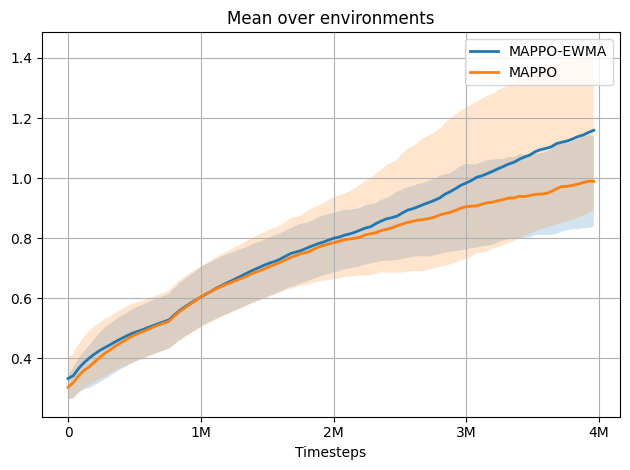

In [54]:
env = "HeuristicEnemySMAX"
scenario = "2s3z"

env_ns = [1, 2, 4, 8, 16, 32]
seeds = [43]
colors = ['blue', "orange", 'green', 'red', 'yellow', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']

ax = plt.gca()
# fig, axs = plt.subplots(ncols = 3, nrows = 2, figsize=(12, 6), sharex=True, sharey=True)

i = 0
mappo_dfs = []
mappo_ewma_dfs = []

for env_n in env_ns:
    # ax = axs[i//3][i%3]
    df = read_system_json("ff_mappo_ewma", env, scenario, env_n, seed)
    df.rename(columns={"rolling_20": f"{env_n}"}, inplace=True)
    df = df.drop(columns=["rolling_10"])
    df = df.drop(columns=["mean_episode_returns"])
    mappo_ewma_dfs.append(df)

    df = read_system_json("ff_mappo", env, scenario, env_n, seed)
    df.rename(columns={"rolling_20": f"{env_n}"}, inplace=True)
    df = df.drop(columns=["rolling_10"])
    df = df.drop(columns=["mean_episode_returns"])
    mappo_dfs.append(df)


mappo = pd.concat(mappo_dfs, axis=1)
mappo_ewma = pd.concat(mappo_ewma_dfs, axis=1)

print(mappo.shape)
print(mappo.columns)

mappo_mean = mappo.mean(axis=1)
mappo_ewma_mean = mappo_ewma.mean(axis=1)
mappo_std = mappo.std(axis=1)
mappo_ewma_std = mappo_ewma.std(axis=1)

mappo_ewma_mean.plot(y="rolling_20", label=f"MAPPO-EWMA", ax=ax, linewidth=2)
mappo_mean.plot(y="rolling_20", label=f"MAPPO", ax=ax, linewidth=2)
plt.fill_between(mappo_mean.index, mappo_mean - mappo_std, mappo_mean + mappo_std, alpha=0.2)
plt.fill_between(mappo_ewma_mean.index, mappo_ewma_mean - mappo_ewma_std, mappo_ewma_mean + mappo_ewma_std, alpha=0.2)


ax.set_xticks([0, 25, 50, 75, 100], ["0", "1M", "2M", "3M", "4M"])
ax.grid(True)
ax.set_title(f"Mean over environments")
ax.set_xlabel("Timesteps")
plt.legend()

plt.tight_layout()
plt.savefig(f"../Images/ff_mappo_mean_{env}_{scenario}.jpeg", pad_inches=0.1, bbox_inches="tight")


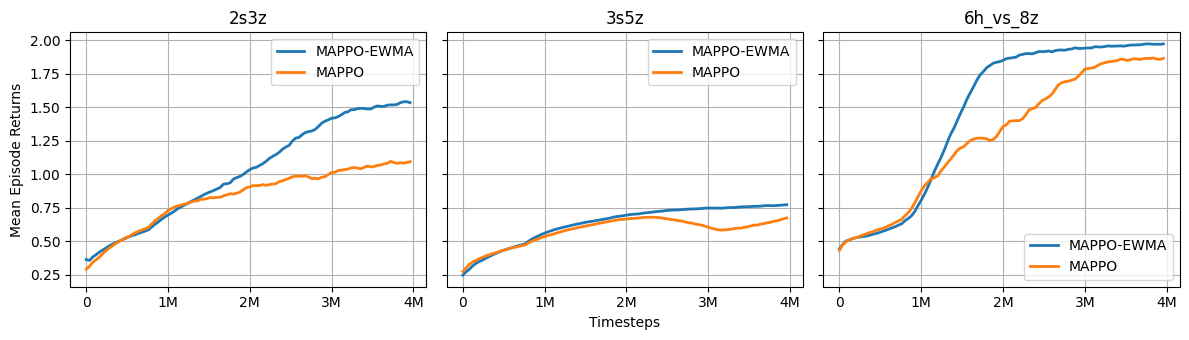

In [65]:
env = "HeuristicEnemySMAX"
scenarios = ["2s3z", "3s5z", "6h_vs_8z"]

env_n = 4
seeds = [43]
colors = ['blue', "orange", 'green', 'red', 'purple', 'brown', 'gray', 'olive', 'cyan']

# ax = plt.gca()
fig, axs = plt.subplots(ncols = 3, nrows = 1, figsize=(12, 3.5), sharex=True, sharey=True)

i = 0
for scenario in scenarios:
    df = read_system_json("ff_mappo_ewma", env, scenario, env_n, seed)
    if df is None: continue
    df.plot(y="rolling_20", label=f"MAPPO-EWMA", ax=axs[i], linewidth=2)

    df = read_system_json("ff_mappo", env, scenario, env_n, seed)
    if df is None: continue
    df.plot(y="rolling_20", label=f"MAPPO", ax=axs[i], linewidth=2)


    axs[i].grid(True)
    axs[i].set_title(f"{scenario}")

    i += 1

axs[0].set_ylabel("Mean Episode Returns")
axs[1].set_xlabel("Timesteps")
axs[1].set_xticks([0, 25, 50, 75, 100], ["0", "1M", "2M", "3M", "4M"])

plt.tight_layout()
plt.savefig(f"../Images/ff_mappo_{env}_{env_n}_scenario_mean.jpeg", pad_inches=0.1, bbox_inches="tight")

(100, 3)
Index(['4', '4', '4'], dtype='object')


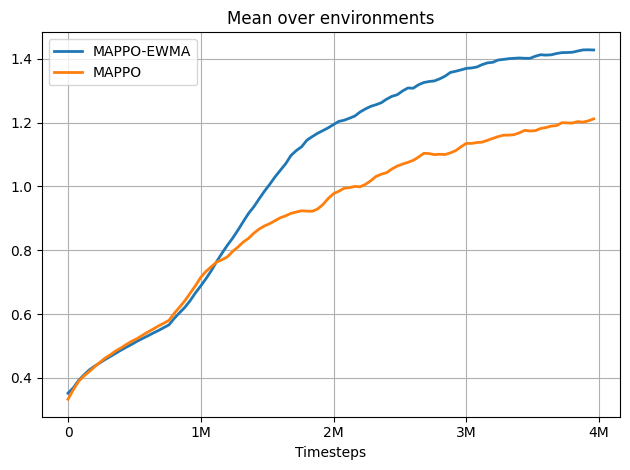

In [68]:
env = "HeuristicEnemySMAX"
scenarios = ["2s3z", "3s5z", "6h_vs_8z"]

env_n = 4
seeds = 43
colors = ['blue', "orange", 'green', 'red', 'yellow', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']

ax = plt.gca()

i = 0
mappo_dfs = []
mappo_ewma_dfs = []

for scenario in scenarios:
    df = read_system_json("ff_mappo_ewma", env, scenario, env_n, seed)
    df.rename(columns={"rolling_20": f"{env_n}"}, inplace=True)
    df = df.drop(columns=["rolling_10"])
    df = df.drop(columns=["mean_episode_returns"])
    mappo_ewma_dfs.append(df)

    df = read_system_json("ff_mappo", env, scenario, env_n, seed)
    df.rename(columns={"rolling_20": f"{env_n}"}, inplace=True)
    df = df.drop(columns=["rolling_10"])
    df = df.drop(columns=["mean_episode_returns"])
    mappo_dfs.append(df)


mappo = pd.concat(mappo_dfs, axis=1)
mappo_ewma = pd.concat(mappo_ewma_dfs, axis=1)

print(mappo.shape)
print(mappo.columns)

mappo_mean = mappo.mean(axis=1)
mappo_ewma_mean = mappo_ewma.mean(axis=1)
mappo_std = mappo.std(axis=1)
mappo_ewma_std = mappo_ewma.std(axis=1)

mappo_ewma_mean.plot(y="rolling_20", label=f"MAPPO-EWMA", ax=ax, linewidth=2)
mappo_mean.plot(y="rolling_20", label=f"MAPPO", ax=ax, linewidth=2)
# plt.fill_between(mappo_mean.index, mappo_mean - mappo_std, mappo_mean + mappo_std, alpha=0.2)
# plt.fill_between(mappo_ewma_mean.index, mappo_ewma_mean - mappo_ewma_std, mappo_ewma_mean + mappo_ewma_std, alpha=0.2)


ax.set_xticks([0, 25, 50, 75, 100], ["0", "1M", "2M", "3M", "4M"])
ax.grid(True)
ax.set_title(f"Mean over environments")
ax.set_xlabel("Timesteps")
plt.legend()

plt.tight_layout()
plt.savefig(f"../Images/ff_mappo_scneario_mean_{env}_{scenario}.jpeg", pad_inches=0.1, bbox_inches="tight")
